In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

df = pd.read_csv("prs_com_metricas.csv")

In [29]:
def remove_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[col] >= lower) & (df[col] <= upper)]

In [30]:
df_no_outliers_additions = remove_outliers(df, 'additions')
df_no_outliers_deletions = remove_outliers(df, 'deletions')
df_no_outliers_changed_files = remove_outliers(df, 'changed_files')


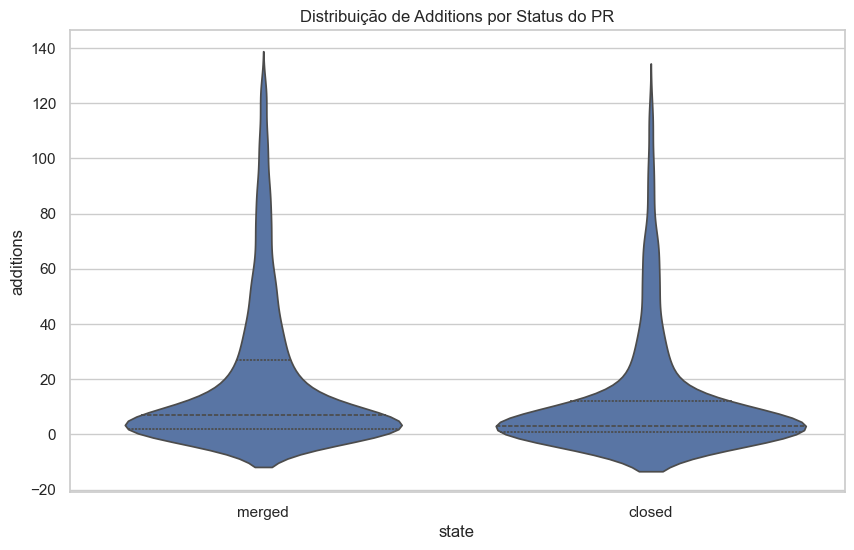

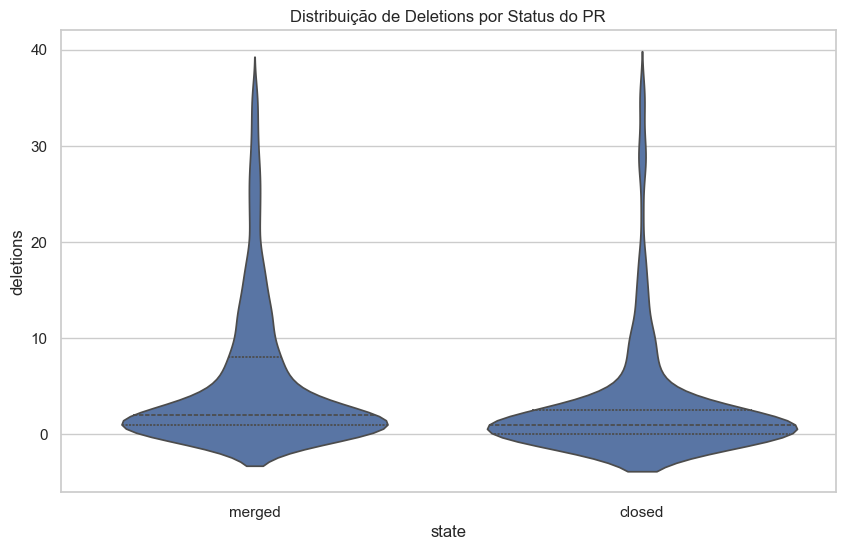

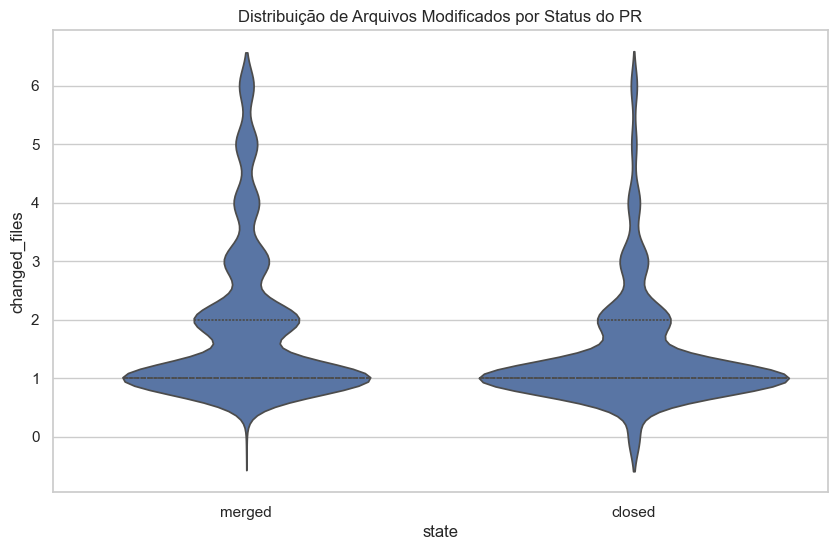

In [31]:
sns.violinplot(x='state', y='additions', data=df_no_outliers_additions, inner='quartile')
plt.title("Distribuição de Additions por Status do PR")
plt.show()

sns.violinplot(x='state', y='deletions', data=df_no_outliers_deletions, inner='quartile')
plt.title("Distribuição de Deletions por Status do PR")
plt.show()

sns.violinplot(x='state', y='changed_files', data=df_no_outliers_changed_files, inner='quartile')
plt.title("Distribuição de Arquivos Modificados por Status do PR")
plt.show()


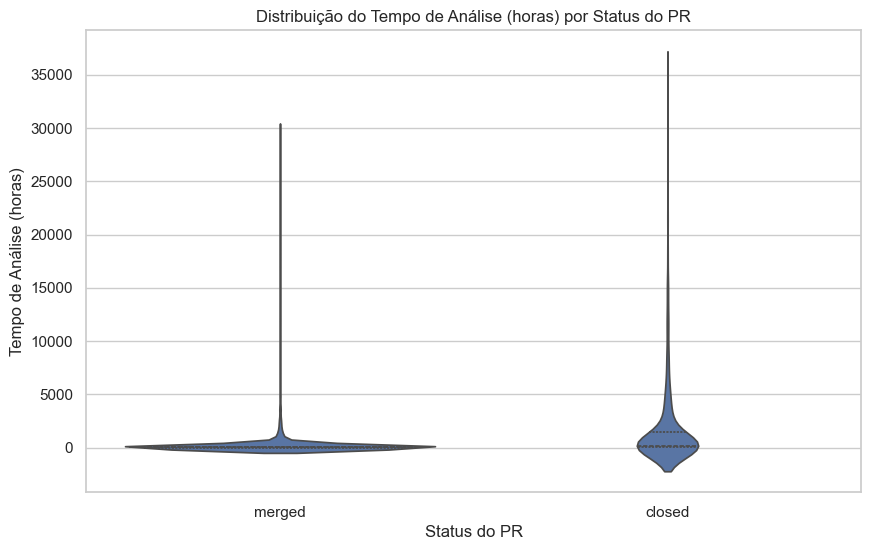

In [ ]:
# RQ02: Tempo de Análise × Status

sns.violinplot(x='state', y='time_hours', data=df, inner='quartile')
plt.title("Distribuição do Tempo de Análise (horas) por Status do PR")
plt.xlabel("Status do PR")
plt.ylabel("Tempo de Análise (horas)")
plt.show()



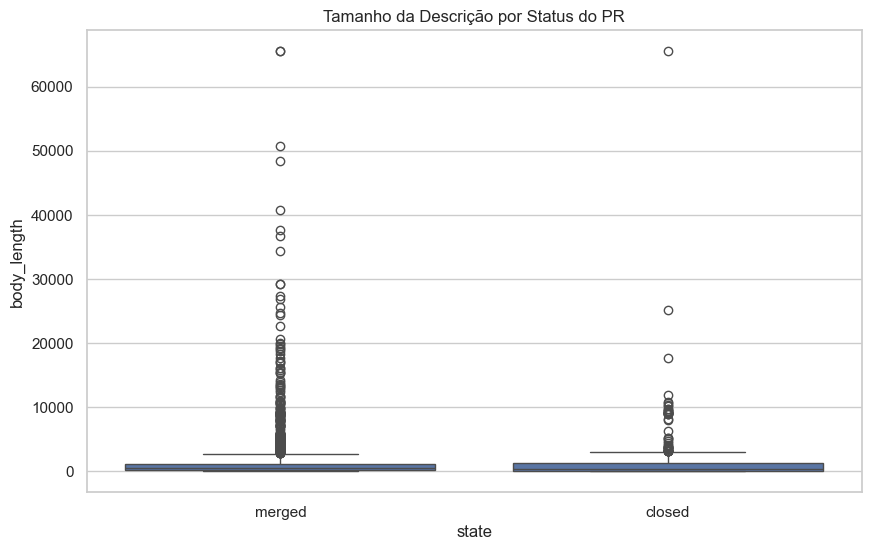

In [ ]:
# RQ03: Descrição × Status

sns.violinplot(x='state', y='body_length', data=df, inner='quartile')
plt.title("Distribuição do Tamanho da Descrição por Status do PR")
plt.xlabel("Status do PR")
plt.ylabel("Tamanho da Descrição (número de caracteres)")
plt.show()


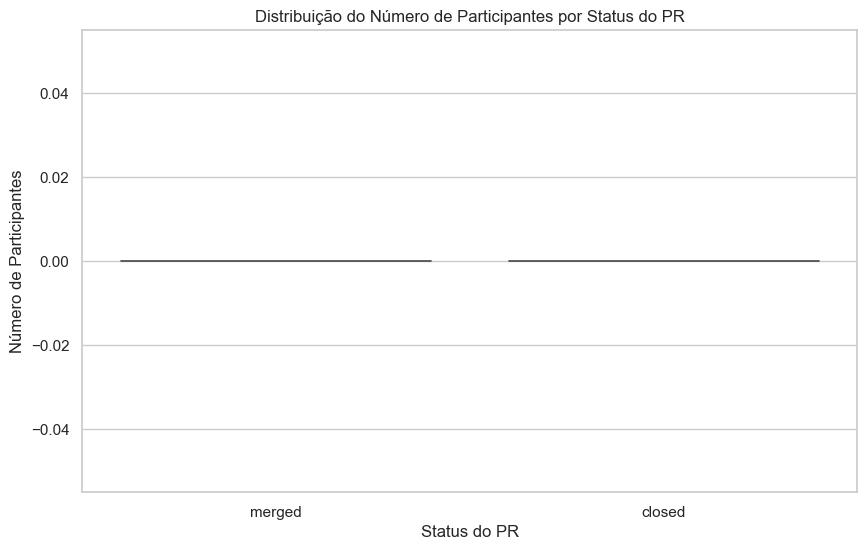

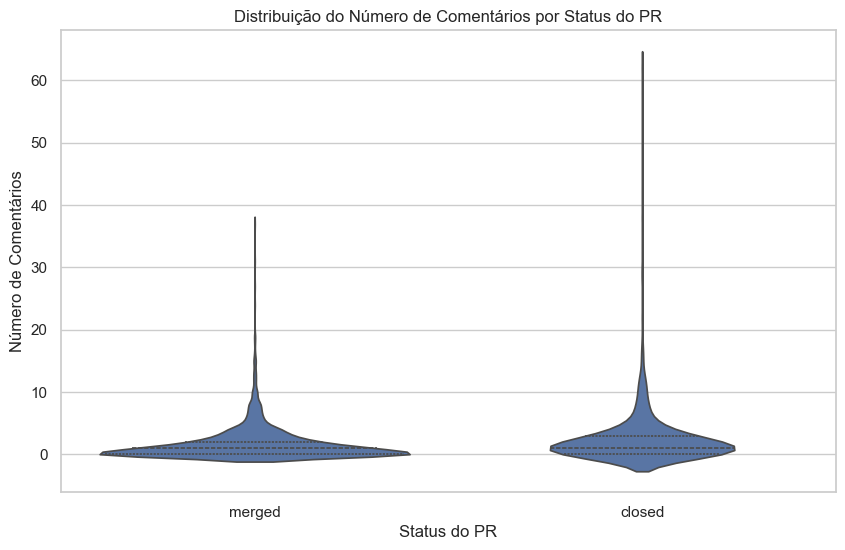

In [ ]:
# RQ04: Interações × Status

# sns.violinplot(x='state', y='participants', data=df, inner='quartile')
# plt.title("Distribuição do Número de Participantes por Status do PR")
# plt.xlabel("Status do PR")
# plt.ylabel("Número de Participantes")
# plt.show()

sns.violinplot(x='state', y='comments', data=df, inner='quartile')
plt.title("Distribuição do Número de Comentários por Status do PR")
plt.xlabel("Status do PR")
plt.ylabel("Número de Comentários")
plt.show()


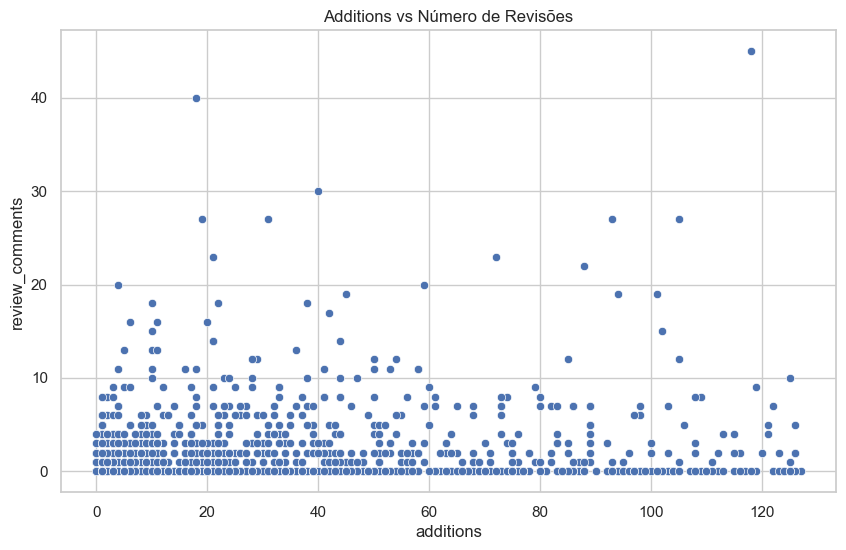

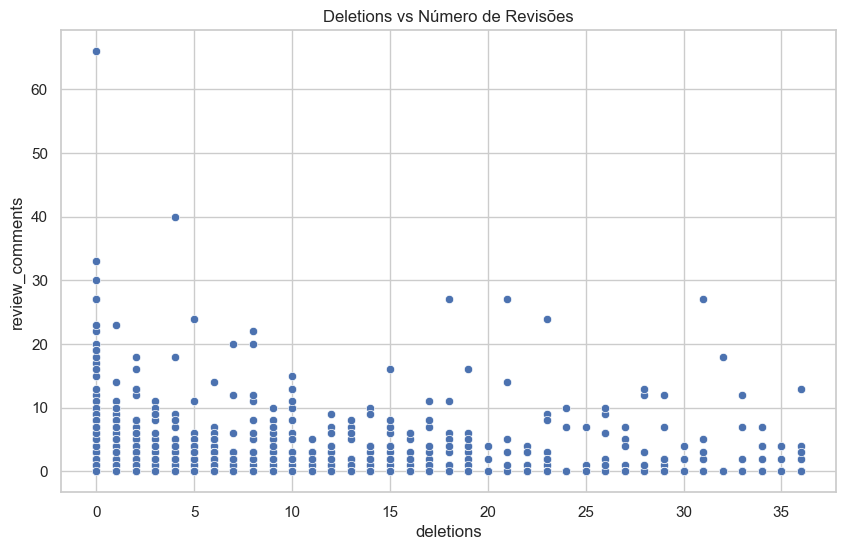

In [35]:
# RQ05: Tamanho do PR × Número de Revisões
sns.scatterplot(x='additions', y='review_comments', data=df_no_outliers_additions)
plt.title("Additions vs Número de Revisões")
plt.show()

sns.scatterplot(x='deletions', y='review_comments', data=df_no_outliers_deletions)
plt.title("Deletions vs Número de Revisões")
plt.show()

In [36]:
corr, p = stats.spearmanr(df['additions'], df['review_comments'])
print("➡️ Correlação de Spearman entre Additions e Review Comments:")
print(f"Coeficiente de Correlação: {corr:.3f}")
print(f"p-valor: {p:.4f}")


➡️ Correlação de Spearman entre Additions e Review Comments:
Coeficiente de Correlação: 0.307
p-valor: 0.0000


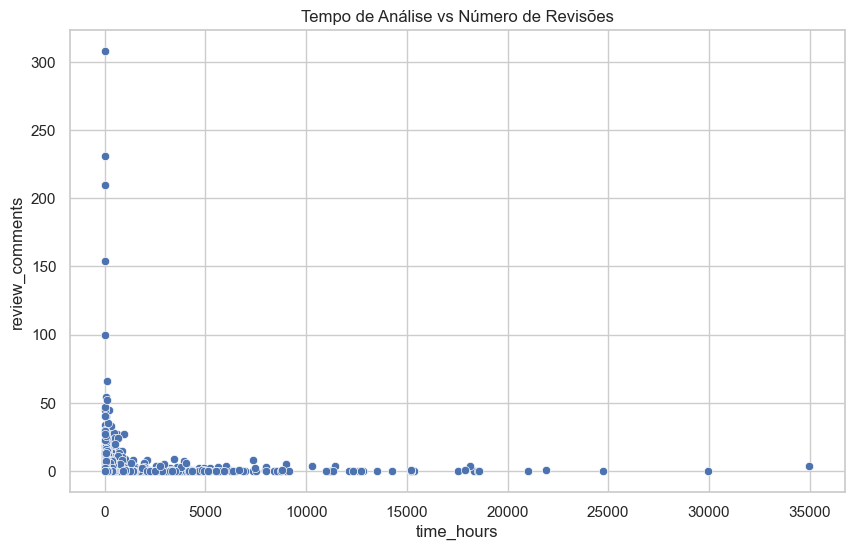

In [37]:
# RQ06: Tempo de Análise × Número de Revisões

sns.scatterplot(x='time_hours', y='review_comments', data=df)
plt.title("Tempo de Análise vs Número de Revisões")
plt.show()


In [38]:
corr, p = stats.spearmanr(df['time_hours'], df['review_comments'])
print("➡️ Correlação de Spearman entre Tempo de Análise e Review Comments:")
print(f"Coeficiente de Correlação: {corr:.3f}")
print(f"p-valor: {p:.4f}")

➡️ Correlação de Spearman entre Tempo de Análise e Review Comments:
Coeficiente de Correlação: 0.115
p-valor: 0.0000


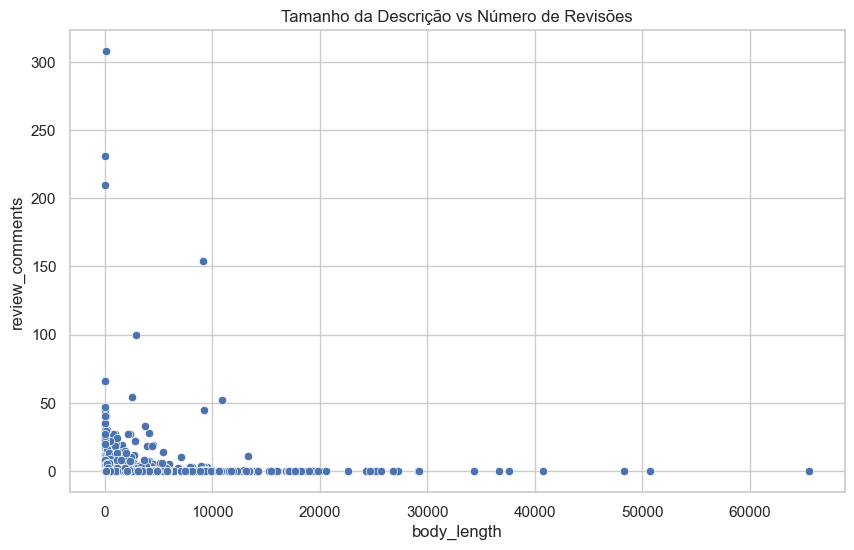

In [39]:
# RQ07: Descrição × Número de Revisões

sns.scatterplot(x='body_length', y='review_comments', data=df)
plt.title("Tamanho da Descrição vs Número de Revisões")
plt.show()

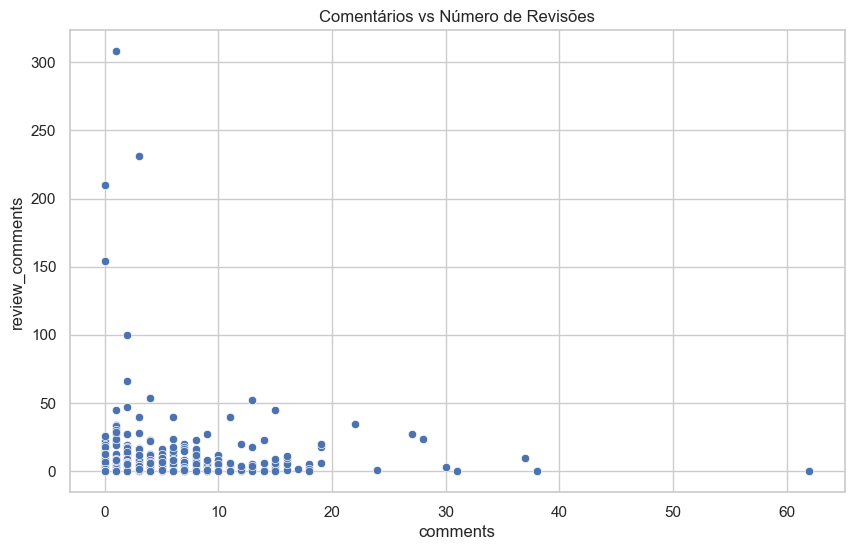

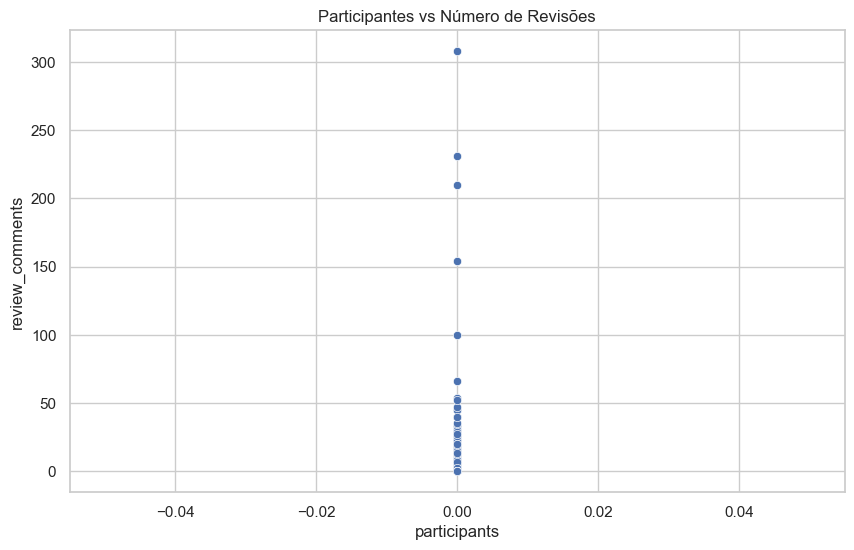

In [40]:
# RQ08: Interações × Número de Revisões

sns.scatterplot(x='comments', y='review_comments', data=df)
plt.title("Comentários vs Número de Revisões")
plt.show()

sns.scatterplot(x='participants', y='review_comments', data=df)
plt.title("Participantes vs Número de Revisões")
plt.show()

